# Introdução


Algumas informações dadas pelo TSE:


- SITUAÇÃO DO REGISTRO
    - Indica a situacao do filiado calculado pela aplicacao:
        1. REGULAR;
        2. EXCLUIDO;
        3. SUB_JUDICE;
        4. CANCELADO;
        5. DESFILIADO;
        6. EM_TRANSFERENCIA;
        7. TRANSFERIDO;
        8. RECEPCIONADO;
        9. ERRO;
        10. AGUARDANDO ACEITE DO PARTIDO.


- TIPO DO REGISTRO
    - Tipo da anotacao.
        1. Oficial
        2. Interna


- MOTIVO DO CANCELAMENTO
    1. Judicial;
    2. A pedido do eleitor;
    3. A pedido do partido;
    4. Cancelamento automatico;
    5. Cancelamento automatico por inscricao inexistente;
    6. Cancelamento automatico a pedido do partido;
    7. Cancelamento automatico por falecimento;
    8. Cancelamento automatico por suspensao de direitos politicos.


- DATA DO PROCESSAMENTO
    - Data de processamento diario que o registro participou.


- DATA DA DESFILIACAO
    - Data da desfiliacao que o partido comunicou. Só vale a partir da proxima relacao oficial.
    
    
- DATA DO CANCELAMENTO
    - Data do cancelamento da filiacao. Passa a ser desconsiderado a partir desta data.


- DATA DA REGULARIZACAO
    - Armazena a data de regulacao do registro de filiacao apos decisao judicial ou da corregedoria-geral eleitoral.

---


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata
import re 

def limpar_texto(texto):
    # Se vazio, retorna
    if texto is None or len(texto.strip()) == 0:
        return texto

    # Remover acentos
    result = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')

    # Remover caracteres especiais
    lista = '-#?º°ª.:/;~^`[{]}\\|!$%"\'&*()=+,><\t\r\n…'
    for i in range(0, len(lista)):
        result = result.replace(lista[i], ' ')

    # Transformar multiplos espacos em apenas um
    result = re.sub(' +', ' ', result)

    # Transformar em LOWER case
    result = result.lower()

    return result

# Dados CEAF

In [5]:
!pip install pickle5

     |████████████████████████████████| 132 kB 31.9 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219300 sha256=1e5b3765de32db4c4e69cf15f7ff717c6bb771237caac5bf166141bfa03fa34b
  Stored in directory: /root/.cache/pip/wheels/7e/6a/00/67136a90d6aca437d806d1d3cedf98106e840c97a3e5188198
Successfully built pickle5


In [8]:
import pickle5 as pickle

with open('/content/df_ceaf.pickle', "rb") as fh:
  df_ceaf = pickle.load(fh)
# df_ceaf = pd.read_pickle('df_ceaf.pickle')

df_ceaf.shape

(1193, 13)

In [9]:
# Remover coluna cpf
df_ceaf.drop(columns='cpf', axis=1, inplace=True)

In [10]:
# Separar em TREINO (80%) e TESTE (20%)
df_ceaf_train, df_ceaf_test = train_test_split(df_ceaf, test_size=0.2, random_state=171)

In [11]:
# Criar coluna para rotulo (CEAF = 1)
df_ceaf_train['rotulo'] = 1
df_ceaf_test['rotulo'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df_ceaf_train.shape, df_ceaf_test.shape

((954, 13), (239, 13))

# Dados Filiados

In [14]:
with open('/content/df_filiados.pickle', "rb") as fh:
  df_filiados = pickle.load(fh)
# df_filiados = pd.read_pickle('df_filiados.pickle')
df_filiados.shape

(246654, 12)

In [23]:
# Separar em TREINO (80%) e TESTE (20%)
df_filiados_train, df_filiados_test = train_test_split(df_filiados, test_size=0.2, random_state=171)

In [24]:
# Criar coluna para rotulo (NAO-CEAF = 0)
df_filiados_train['rotulo'] = 0
df_filiados_test['rotulo'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
df_filiados_train.shape, df_filiados_test.shape

((197323, 13), (49331, 13))

# Juntar dados

In [26]:
# Juntar dados de CEAF e Filiados para TREINO e TESTE
df_train = pd.concat([df_ceaf_train, df_filiados_train])
df_test = pd.concat([df_ceaf_test, df_filiados_test])

# Engenharia de atributos

In [27]:
df_train.head(30)

,numero_da_inscricao,nome_do_filiado,sigla_do_partido,uf,data_da_filiacao,situacao_do_registro,tipo_do_registro,data_do_processamento,data_da_desfiliacao,data_do_cancelamento,data_da_regularizacao,motivo_do_cancelamento,rotulo
1138,1.408744e+10,raimundo carlos nascimento,PV,BA,2008-01-23,REGULAR,OFICIAL,NaT,NaT,NaT,NaT,NaN,1
923,2.063773e+10,maria jose de arruda campos,PL,MT,2008-01-08,REGULAR,OFICIAL,NaT,NaT,NaT,NaT,NaN,1
191,1.512443e+10,pedro bezerra filho,MDB,PE,2011-09-09,CANCELADO,OFICIAL,NaT,NaT,2019-10-16,NaT,CANCELAMENTO AUTOMÁTICO,1
1005,9.437852e+10,rafael de souza e mello coelho da silva,PSOL,RJ,2015-03-31,REGULAR,OFICIAL,NaT,NaT,NaT,NaT,NaN,1
105,5.811562e+09,elson coelho meireles,PSC,AM,1992-04-10,CANCELADO,OFICIAL,NaT,2013-04-20,2019-10-15,NaT,CANCELAMENTO AUTOMÁTICO,1
797,8.556594e+10,angelo rodrigo ruth,PSC,PR,2007-09-27,CANCELADO,OFICIAL,NaT,2011-07-30,2010-05-10,NaT,A PEDIDO DO ELEITOR,1
810,2.515779e+10,carmen lucia sacramento,PT,BA,1983-12-10,CANCELADO,OFICIAL,NaT,2011-09-30,2011-12-16,NaT,JUDICIAL,1
176,2.314142e+09,ubaldino rezende rodrigues,PDT,MT,2011-09-23,CANCELADO,OFICIAL,NaT,2015-08-05,2019-10-15,NaT,CANCELAMENTO AUTOMÁTICO,1
735,1.346177e+10,alberto batista da silva,PODE,GO,2007-10-03,CANCELADO,OFICIAL,NaT,NaT,2019-10-16,NaT,CANCELAMENTO AUTOMÁTICO,1
481,3.488875e+10,raimundo dos santos furtado,PV,MA,2011-09-09,REGULAR,OFICIAL,NaT,NaT,NaT,NaT,NaN,1


In [28]:
df_train.columns

Index(['numero_da_inscricao', 'nome_do_filiado', 'sigla_do_partido', 'uf',
       'data_da_filiacao', 'situacao_do_registro', 'tipo_do_registro',
       'data_do_processamento', 'data_da_desfiliacao', 'data_do_cancelamento',
       'data_da_regularizacao', 'motivo_do_cancelamento', 'rotulo'],
      dtype='object')

In [29]:
colunas_selecionadas = [
    # Categoricos
    'sigla_do_partido', 
    'uf',
    'situacao_do_registro', 'tipo_do_registro','motivo_do_cancelamento',
    
    # Datas
    'data_da_filiacao', 
    'data_da_desfiliacao', 'data_do_cancelamento',
    
    # Rotulo
    'rotulo']

In [30]:
# Manter somente colunas selecionadas
df_train = df_train[colunas_selecionadas]

## Datas

- data_da_filiacao
- data_da_desfiliacao
- data_do_cancelamento

In [31]:
df_train.columns

Index(['sigla_do_partido', 'uf', 'situacao_do_registro', 'tipo_do_registro',
       'motivo_do_cancelamento', 'data_da_filiacao', 'data_da_desfiliacao',
       'data_do_cancelamento', 'rotulo'],
      dtype='object')

In [32]:
def merge_datas_finais(x):
    '''
    Analisa 'data_do_cancelamento' e 'data_da_desfiliacao'
    - Se ambas existirem, pega mais recente
    - Se apenas uma existir, retorna ela
    - Se nenhuma existir, retorna None
    '''
    if not isinstance(x['data_do_cancelamento'], pd._libs.tslibs.nattype.NaTType) \
       and not isinstance(x['data_da_desfiliacao'], pd._libs.tslibs.nattype.NaTType): 
            if x['data_do_cancelamento'] >= x['data_da_desfiliacao']:
                return x['data_do_cancelamento']
            else:
                return x.data_da_desfiliacao
    elif isinstance(x['data_do_cancelamento'], pd._libs.tslibs.nattype.NaTType) \
       and not isinstance(x['data_da_desfiliacao'], pd._libs.tslibs.nattype.NaTType): 
        return x['data_da_desfiliacao']
        
    elif not isinstance(x['data_do_cancelamento'], pd._libs.tslibs.nattype.NaTType) \
       and isinstance(x['data_da_desfiliacao'], pd._libs.tslibs.nattype.NaTType): 
        return x['data_do_cancelamento']
    
    else:
        return None
    
df_train['data_final'] = df_train.apply(lambda x: merge_datas_finais(x), axis=1)

In [33]:
def contar_dias(x):
    '''
    Conta dias entre 'data_da_filiacao' e a 'data_final'
    - Caso data_final seja None, retorna NaN
    - Caso nao exista data_da_filiacao, retorna NaN
    - Ambos existindo, retorna diferenca em dias
    '''
    if x['data_final'] is None:
        return np.NaN
    else:
        if isinstance(x['data_da_filiacao'], pd._libs.tslibs.nattype.NaTType):
            return np.NaN
        else:
            delta = x['data_final'] - x['data_da_filiacao']
            return delta.days

df_train['nr_dias_filiado'] = df_train.apply(lambda x: contar_dias(x), axis=1)

In [35]:
def coluna_nao_nat(data):
    '''
    Se valor de data for invalido, retorna 0.
    Caso seja valido, retorna 1.
    '''
    if isinstance(data, pd._libs.tslibs.nattype.NaTType):
        return 0
    else:
        return 1

df_train['bl_desfiliacao'] = df_train['data_da_desfiliacao'].apply(coluna_nao_nat)
df_train['bl_cancelamento'] = df_train['data_do_cancelamento'].apply(coluna_nao_nat)

In [36]:
# Criar mes
df_train['mes_filiacao'] = df_train.data_da_filiacao.dt.month
df_train['mes_filiacao'].fillna(0, inplace=True)
df_train['mes_filiacao'] = df_train['mes_filiacao'].astype('int')

# Criar ano
df_train['ano_filiacao'] = df_train.data_da_filiacao.dt.year % 2
df_train['ano_filiacao'].fillna(0, inplace=True)
df_train['ano_filiacao'] = df_train['ano_filiacao'].astype('int')

In [37]:
# Remover colunas originais
df_train.drop(columns=['data_da_filiacao', 'data_da_desfiliacao', 'data_do_cancelamento', 'data_final'], axis=1, inplace=True)

In [38]:
df_train.columns

Index(['sigla_do_partido', 'uf', 'situacao_do_registro', 'tipo_do_registro',
       'motivo_do_cancelamento', 'rotulo', 'nr_dias_filiado', 'bl_desfiliacao',
       'bl_cancelamento', 'mes_filiacao', 'ano_filiacao'],
      dtype='object')

## Partido e UF

- sigla_do_partido
- uf

In [46]:
def ver_diff_rotulo(coluna):
    '''
    Calcula proporcao de cada valor de coluna em relacao ao total
    '''
    # Quantidade de registros para cada coluna separado por rotulo
    c = df_train.groupby([coluna, 'rotulo']).agg(prop=('rotulo', 'count'))
    # Divide pelo total de cada rotulo (TOTAL GERAL)
    df_c = pd.DataFrame(c/c.groupby(level=1).sum()).reset_index()
    # Fazer merge para subtrair (~= pivotear)
    df_d = pd.merge(df_c[df_c.rotulo==1], df_c[df_c.rotulo==0], on=coluna, how='right')
    # Obtem diferenca das proporcoes entre rotulo=1 e rotulo=0
    df_d['diff'] = df_d.prop_x - df_d.prop_y
    # Normalizar 0-1
    min_diff = min(df_d['diff'])
    maxmin_diff = max(df_d['diff']) - min_diff
    df_d['diff'] = df_d['diff'].apply(lambda x: (x - min_diff)/maxmin_diff)
    # Ordena
    df_d = df_d[[coluna,'diff']].sort_values('diff')
    # Plota
    sns.set(rc={'figure.figsize':(14.7,8.27)})
    sns.barplot(x=coluna, y="diff", data=df_d)
    _ = plt.xticks(rotation=90)
    
    # Retorna DataFrame
    return df_d

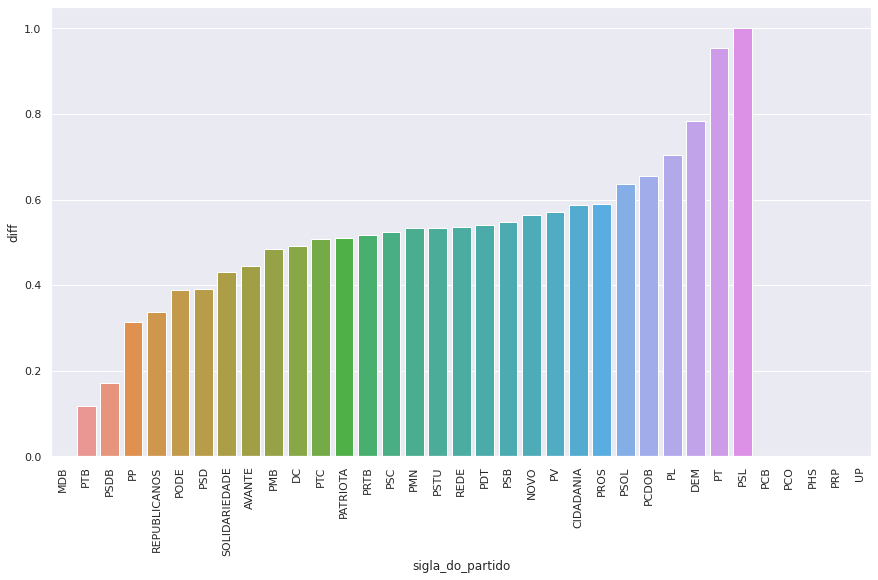

In [47]:
diff_sigla_do_partido = ver_diff_rotulo('sigla_do_partido')

In [48]:
# Gerar dicionario para substituicao de PARTIDO por VALOR
diff_sigla_do_partido.index = diff_sigla_do_partido.sigla_do_partido
diff_sigla_do_partido = diff_sigla_do_partido['diff']
diff_sigla_do_partido.fillna(0, inplace=True)
diff_sigla_do_partido = diff_sigla_do_partido.to_dict()
diff_sigla_do_partido

{'AVANTE': 0.4444744174254416,
 'CIDADANIA': 0.5883795030985551,
 'DC': 0.4919375706246683,
 'DEM': 0.7845347549601712,
 'MDB': 0.0,
 'NOVO': 0.56381344458452,
 'PATRIOTA': 0.5090322253228586,
 'PCB': 0.0,
 'PCDOB': 0.6541957042776877,
 'PCO': 0.0,
 'PDT': 0.54091515194813,
 'PHS': 0.0,
 'PL': 0.7048199239758387,
 'PMB': 0.48460904971541024,
 'PMN': 0.5332202757814344,
 'PODE': 0.38853085878725513,
 'PP': 0.31504733431899284,
 'PROS': 0.5894950134736838,
 'PRP': 0.0,
 'PRTB': 0.5161619952378171,
 'PSB': 0.546998130324893,
 'PSC': 0.524619095080733,
 'PSD': 0.3913697853184328,
 'PSDB': 0.17245008464069722,
 'PSL': 1.0,
 'PSOL': 0.6358348151626643,
 'PSTU': 0.534565683882024,
 'PT': 0.9541214095224488,
 'PTB': 0.11668436730316341,
 'PTC': 0.5066737861269409,
 'PV': 0.5703497930375947,
 'REDE': 0.5369383895876695,
 'REPUBLICANOS': 0.3384534493589,
 'SOLIDARIEDADE': 0.4300498870440924,
 'UP': 0.0}

In [49]:
# Substituir sigla_do_partido por VALOR consultando dicionario
df_train.sigla_do_partido = df_train.sigla_do_partido.apply(lambda x: diff_sigla_do_partido.get(x,0))

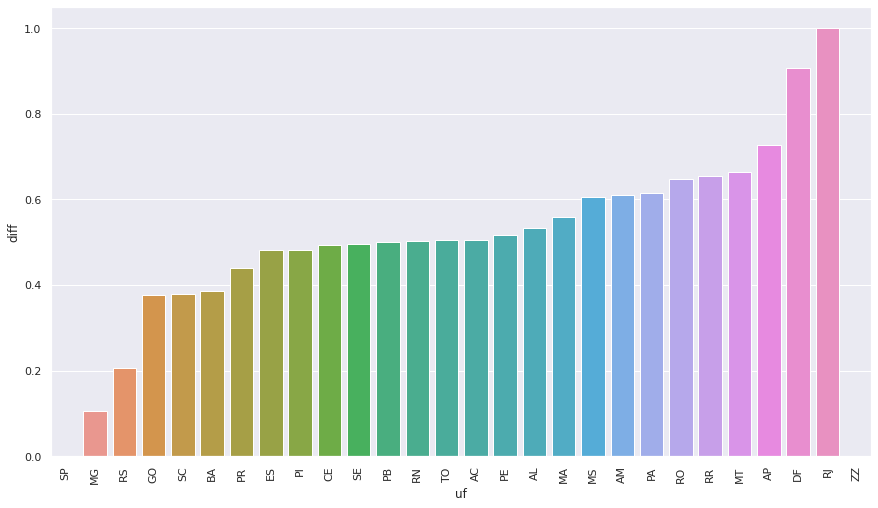

In [50]:
diff_uf = ver_diff_rotulo('uf')

In [51]:
# Gerar dicionario para substituicao de UF por VALOR
diff_uf.index = diff_uf.uf
diff_uf = diff_uf['diff']
diff_uf.fillna(0, inplace=True)
diff_uf = diff_uf.to_dict()
diff_uf

{'AC': 0.5060137676898384,
 'AL': 0.5339949490570423,
 'AM': 0.610175634731232,
 'AP': 0.7260694598448074,
 'BA': 0.38642886400979665,
 'CE': 0.49454926532558374,
 'DF': 0.9080857380437889,
 'ES': 0.48124426911693846,
 'GO': 0.3758391047196174,
 'MA': 0.5582461750907729,
 'MG': 0.10666089346149399,
 'MS': 0.605181599262398,
 'MT': 0.6632149011199957,
 'PA': 0.6155699205930172,
 'PB': 0.5003524373471165,
 'PE': 0.5167306593857136,
 'PI': 0.4815509495531719,
 'PR': 0.43916069077403713,
 'RJ': 1.0,
 'RN': 0.502036728200881,
 'RO': 0.6481946771347766,
 'RR': 0.6552807824675334,
 'RS': 0.20550692409771504,
 'SC': 0.37956229062417335,
 'SE': 0.49549230371289577,
 'SP': 0.0,
 'TO': 0.5056980402598183,
 'ZZ': 0.0}

In [52]:
# Substituir uf por VALOR consultando dicionario
df_train.uf = df_train.uf.apply(lambda x: diff_uf.get(x,0))

## Restantes

- situacao_do_registro
- tipo_do_registro
- motivo_do_cancelamento

In [53]:
colunas_dummy = ['situacao_do_registro', 'tipo_do_registro', 'motivo_do_cancelamento']

In [54]:
# Limpar valores das colunas dummy: Virarao nomes das colunas
for col in colunas_dummy:
    df_train[col] = df_train[col].apply(lambda x: limpar_texto(str(x)).replace(" ", "_"))

In [55]:
# Obter one-hot encoding SOMENTE para colunas dummy
df_dummy = pd.get_dummies(df_train[colunas_dummy])

In [56]:
df_dummy.shape

(198277, 10)

In [57]:
df_dummy.head()

,situacao_do_registro_cancelado,situacao_do_registro_desfiliado,situacao_do_registro_regular,situacao_do_registro_sub_judice,tipo_do_registro_oficial,motivo_do_cancelamento_a_pedido_do_eleitor,motivo_do_cancelamento_a_pedido_do_partido,motivo_do_cancelamento_cancelamento_automatico,motivo_do_cancelamento_judicial,motivo_do_cancelamento_nan
1138,0,0,1,0,1,0,0,0,0,1
923,0,0,1,0,1,0,0,0,0,1
191,1,0,0,0,1,0,0,1,0,0
1005,0,0,1,0,1,0,0,0,0,1
105,1,0,0,0,1,0,0,1,0,0


In [58]:
# Juntar colunas_dummy com colunas restantes
colunas_nao_dummy = list(set(df_train.columns) - set(colunas_dummy))
df_train = pd.concat([df_dummy, df_train[colunas_nao_dummy]], axis=1)

In [59]:
df_train.shape

(198277, 18)

In [60]:
df_train.head()

,situacao_do_registro_cancelado,situacao_do_registro_desfiliado,situacao_do_registro_regular,situacao_do_registro_sub_judice,tipo_do_registro_oficial,motivo_do_cancelamento_a_pedido_do_eleitor,motivo_do_cancelamento_a_pedido_do_partido,motivo_do_cancelamento_cancelamento_automatico,motivo_do_cancelamento_judicial,motivo_do_cancelamento_nan,mes_filiacao,nr_dias_filiado,ano_filiacao,sigla_do_partido,bl_desfiliacao,bl_cancelamento,rotulo,uf
1138,0,0,1,0,1,0,0,0,0,1,1,NaN,0,0.570350,0,0,1,0.386429
923,0,0,1,0,1,0,0,0,0,1,1,NaN,0,0.704820,0,0,1,0.663215
191,1,0,0,0,1,0,0,1,0,0,9,2959.0,1,0.000000,0,1,1,0.516731
1005,0,0,1,0,1,0,0,0,0,1,3,NaN,1,0.635835,0,0,1,1.000000
105,1,0,0,0,1,0,0,1,0,0,4,10049.0,0,0.524619,1,1,1,0.610176


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198277 entries, 1138 to 23327028
Data columns (total 18 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   situacao_do_registro_cancelado                  198277 non-null  uint8  
 1   situacao_do_registro_desfiliado                 198277 non-null  uint8  
 2   situacao_do_registro_regular                    198277 non-null  uint8  
 3   situacao_do_registro_sub_judice                 198277 non-null  uint8  
 4   tipo_do_registro_oficial                        198277 non-null  uint8  
 5   motivo_do_cancelamento_a_pedido_do_eleitor      198277 non-null  uint8  
 6   motivo_do_cancelamento_a_pedido_do_partido      198277 non-null  uint8  
 7   motivo_do_cancelamento_cancelamento_automatico  198277 non-null  uint8  
 8   motivo_do_cancelamento_judicial                 198277 non-null  uint8  
 9   motivo_do_cancelament

## Imputar valores em nr_dias_filiado

In [63]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Aprender imputacao a partir dos dados de TREINO
impute_dias = IterativeImputer(max_iter=10, random_state=0)
impute_dias.fit(df_train)

# Imputar dados de TREINO
transformed = impute_dias.transform(df_train)

In [64]:
# Gerar DataFrame com dados imputados
df_train = pd.DataFrame(data=transformed, columns=df_train.columns)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198277 entries, 0 to 198276
Data columns (total 18 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   situacao_do_registro_cancelado                  198277 non-null  float64
 1   situacao_do_registro_desfiliado                 198277 non-null  float64
 2   situacao_do_registro_regular                    198277 non-null  float64
 3   situacao_do_registro_sub_judice                 198277 non-null  float64
 4   tipo_do_registro_oficial                        198277 non-null  float64
 5   motivo_do_cancelamento_a_pedido_do_eleitor      198277 non-null  float64
 6   motivo_do_cancelamento_a_pedido_do_partido      198277 non-null  float64
 7   motivo_do_cancelamento_cancelamento_automatico  198277 non-null  float64
 8   motivo_do_cancelamento_judicial                 198277 non-null  float64
 9   motivo_do_cancelamento_nan

In [65]:
df_train.nr_dias_filiado.describe()

count    198277.000000
mean       4219.338732
std        2799.292838
min       -5562.000000
25%        3257.925942
50%        3951.681343
75%        4598.976176
max       75617.000000
Name: nr_dias_filiado, dtype: float64

In [66]:
# NORMALIZAR
min_norm_nr_dias = df_train.nr_dias_filiado.min()
max_norm_nr_dias = df_train.nr_dias_filiado.max()

def normalizar_nr_dias(coluna):
    return (coluna - min_norm_nr_dias) / (max_norm_nr_dias-min_norm_nr_dias)

df_train.nr_dias_filiado = df_train.nr_dias_filiado.apply(normalizar_nr_dias)

In [67]:
df_train.nr_dias_filiado.describe()

count    198277.000000
mean          0.120491
std           0.034483
min           0.000000
25%           0.108648
50%           0.117194
75%           0.125168
max           1.000000
Name: nr_dias_filiado, dtype: float64

# Selecionar atributos

In [68]:
df_train.head()

,situacao_do_registro_cancelado,situacao_do_registro_desfiliado,situacao_do_registro_regular,situacao_do_registro_sub_judice,tipo_do_registro_oficial,motivo_do_cancelamento_a_pedido_do_eleitor,motivo_do_cancelamento_a_pedido_do_partido,motivo_do_cancelamento_cancelamento_automatico,motivo_do_cancelamento_judicial,motivo_do_cancelamento_nan,mes_filiacao,nr_dias_filiado,ano_filiacao,sigla_do_partido,bl_desfiliacao,bl_cancelamento,rotulo,uf
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.125196,0.0,0.570350,0.0,0.0,1.0,0.386429
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.120311,0.0,0.704820,0.0,0.0,1.0,0.663215
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9.0,0.104966,1.0,0.000000,0.0,1.0,1.0,0.516731
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.113845,1.0,0.635835,0.0,0.0,1.0,1.000000
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.192303,0.0,0.524619,1.0,1.0,1.0,0.610176


In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs_chi2 = SelectKBest(score_func=chi2, k='all')

# Analise de Atributos nos dados de Treino
fs_chi2.fit(df_train.loc[:,df_train.columns != 'rotulo'], df_train.rotulo)

Atributo: situacao_do_registro_desfiliado: 20.716242 -- IN
Atributo: situacao_do_registro_regular: 5.653615 -- IN
Atributo: situacao_do_registro_sub_judice: 13.831126 -- IN
Atributo: tipo_do_registro_oficial: 0.048347 -- OUT
Atributo: motivo_do_cancelamento_a_pedido_do_eleitor: 0.000000 -- OUT
Atributo: motivo_do_cancelamento_a_pedido_do_partido: 15.009217 -- IN
Atributo: motivo_do_cancelamento_cancelamento_automatico: 2.427026 -- IN
Atributo: motivo_do_cancelamento_judicial: 79.205195 -- IN
Atributo: motivo_do_cancelamento_nan: 1.662131 -- IN
Atributo: mes_filiacao: 19.000368 -- IN
Atributo: nr_dias_filiado: 0.276492 -- IN
Atributo: ano_filiacao: 0.003351 -- OUT
Atributo: sigla_do_partido: 0.070024 -- IN
Atributo: bl_desfiliacao: 7.981234 -- IN
Atributo: bl_cancelamento: 33.343051 -- IN
Atributo: rotulo: 39.939067 -- IN
Atributo: uf: 89.343190 -- IN


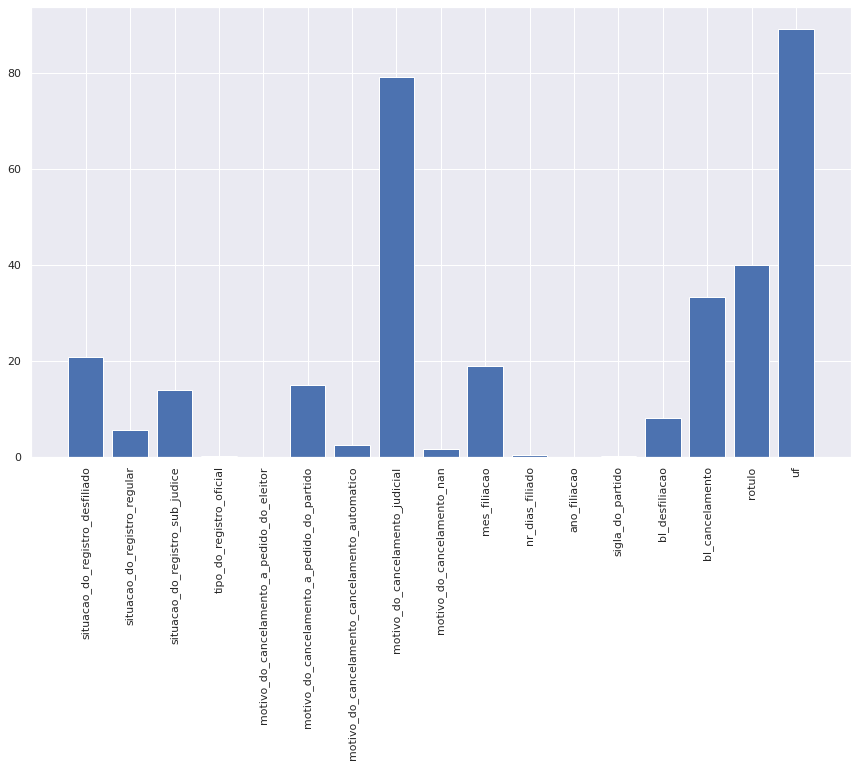

In [84]:
from matplotlib import pyplot

scores = [fs_chi2.scores_[i] for i in range(len(fs_chi2.scores_))]
colunas = [df_train.columns[1:][i] for i in range(len(fs_chi2.scores_))]

colunas_finais = []

for i, score in enumerate(scores):
    if score > 0.05:
        print('Atributo: %s: %f -- IN' % (colunas[i], score))
        colunas_finais.append(colunas[i])
    else:
        print('Atributo: %s: %f -- OUT' % (colunas[i], score))

# plot the scores
pyplot.bar(colunas, scores)
pyplot.xticks(rotation=90)
pyplot.show()

In [85]:
colunas_finais

['situacao_do_registro_desfiliado',
 'situacao_do_registro_regular',
 'situacao_do_registro_sub_judice',
 'motivo_do_cancelamento_a_pedido_do_partido',
 'motivo_do_cancelamento_cancelamento_automatico',
 'motivo_do_cancelamento_judicial',
 'motivo_do_cancelamento_nan',
 'mes_filiacao',
 'nr_dias_filiado',
 'sigla_do_partido',
 'bl_desfiliacao',
 'bl_cancelamento',
 'rotulo',
 'uf']

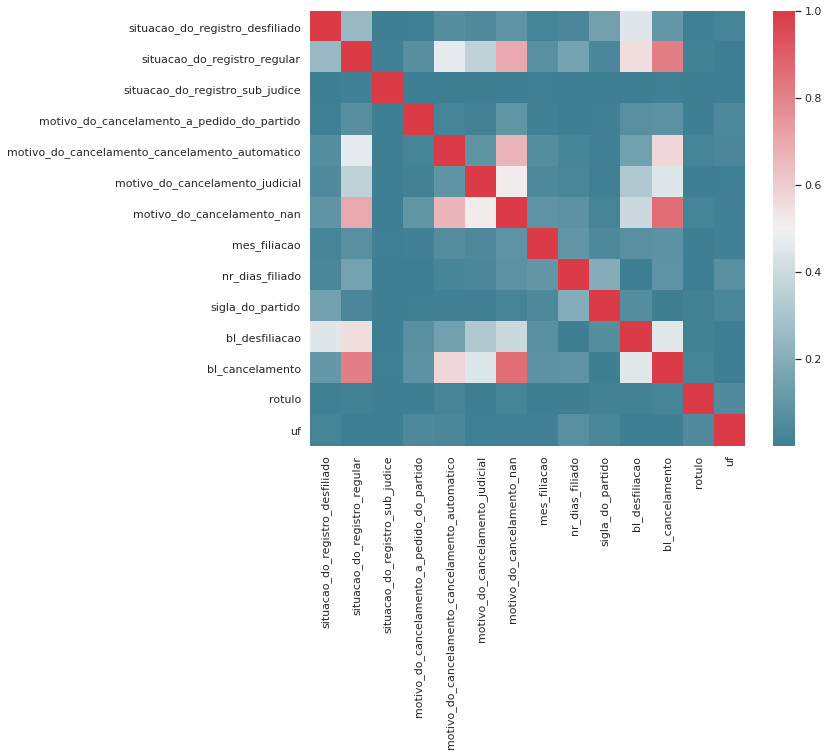

In [87]:
# Matrix de Correlacao (valores absolutos)
corr_matrix = df_train[colunas_finais].corr().abs()

# Plotar
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [90]:
# Limite para correlacao
limite = 0.8

# Selecionar colunas com correlacao acima do limite
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
alta_correlacao = [column for column in upper.columns if any(upper[column] > limite)]
alta_correlacao

['bl_cancelamento']

In [92]:
# Eliminar as de alta_correlacao
colunas_finais = list(set(colunas_finais) - set(alta_correlacao))
colunas_finais

['situacao_do_registro_desfiliado',
 'mes_filiacao',
 'motivo_do_cancelamento_a_pedido_do_partido',
 'nr_dias_filiado',
 'motivo_do_cancelamento_judicial',
 'sigla_do_partido',
 'bl_desfiliacao',
 'situacao_do_registro_regular',
 'situacao_do_registro_sub_judice',
 'rotulo',
 'motivo_do_cancelamento_cancelamento_automatico',
 'uf',
 'motivo_do_cancelamento_nan']

In [93]:
# Filtrar colunas finais
df_train = df_train[colunas_finais]

In [94]:
df_train.shape

(198277, 13)

In [95]:
df_train.head()

,situacao_do_registro_desfiliado,mes_filiacao,motivo_do_cancelamento_a_pedido_do_partido,nr_dias_filiado,motivo_do_cancelamento_judicial,sigla_do_partido,bl_desfiliacao,situacao_do_registro_regular,situacao_do_registro_sub_judice,rotulo,motivo_do_cancelamento_cancelamento_automatico,uf,motivo_do_cancelamento_nan
0,0.0,1.0,0.0,0.125196,0.0,0.570350,0.0,1.0,0.0,1.0,0.0,0.386429,1.0
1,0.0,1.0,0.0,0.120311,0.0,0.704820,0.0,1.0,0.0,1.0,0.0,0.663215,1.0
2,0.0,9.0,0.0,0.104966,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.516731,0.0
3,0.0,3.0,0.0,0.113845,0.0,0.635835,0.0,1.0,0.0,1.0,0.0,1.000000,1.0
4,0.0,4.0,0.0,0.192303,0.0,0.524619,1.0,0.0,0.0,1.0,1.0,0.610176,0.0


# Dados de Teste

In [96]:
df_test = df_test[colunas_selecionadas]
df_test['data_final'] = df_test.apply(lambda x: merge_datas_finais(x), axis=1)
df_test['nr_dias_filiado'] = df_test.apply(lambda x: contar_dias(x), axis=1)

df_test['bl_desfiliacao'] = df_test['data_da_desfiliacao'].apply(coluna_nao_nat)
df_test['bl_cancelamento'] = df_test['data_do_cancelamento'].apply(coluna_nao_nat)

df_test['mes_filiacao'] = df_test.data_da_filiacao.dt.month
df_test['mes_filiacao'].fillna(0, inplace=True)
df_test['mes_filiacao'] = df_test['mes_filiacao'].astype('int')

df_test['ano_filiacao'] = df_test.data_da_filiacao.dt.year % 2
df_test['ano_filiacao'].fillna(0, inplace=True)
df_test['ano_filiacao'] = df_test['ano_filiacao'].astype('int')

df_test.drop(columns=['data_da_filiacao', 'data_da_desfiliacao', 
                      'data_do_cancelamento', 'data_final'], axis=1, inplace=True)

df_test.sigla_do_partido = df_test.sigla_do_partido.apply(lambda x: diff_sigla_do_partido.get(x,0))
df_test.uf = df_test.uf.apply(lambda x: diff_uf.get(x,0))

# Limpar valores das colunas dummy: Virarao nomes das colunas
for col in colunas_dummy:
    df_test[col] = df_test[col].apply(lambda x: limpar_texto(str(x)).replace(" ", "_"))

df_dummy_test = pd.get_dummies(df_test[colunas_dummy])

df_test = pd.concat([df_dummy_test, df_test[colunas_nao_dummy]], axis=1)

transformed_test = impute_dias.transform(df_test)
df_test = pd.DataFrame(data=transformed_test, columns=df_test.columns)

df_test.nr_dias_filiado = df_test.nr_dias_filiado.apply(normalizar_nr_dias)

df_test = df_test[colunas_finais]

In [103]:
df_test.shape

(49570, 13)

In [147]:
df_test.head()

,situacao_do_registro_desfiliado,mes_filiacao,motivo_do_cancelamento_a_pedido_do_partido,nr_dias_filiado,motivo_do_cancelamento_judicial,sigla_do_partido,bl_desfiliacao,situacao_do_registro_regular,situacao_do_registro_sub_judice,rotulo,motivo_do_cancelamento_cancelamento_automatico,uf,motivo_do_cancelamento_nan
0,0.0,9.0,0.0,0.118946,0.0,0.338453,0.0,1.0,0.0,1.0,0.0,0.615570,1.0
1,0.0,2.0,0.0,0.202060,0.0,0.172450,0.0,0.0,0.0,1.0,1.0,0.610176,0.0
2,0.0,5.0,0.0,0.120273,0.0,0.546998,0.0,1.0,0.0,1.0,0.0,0.205507,1.0
3,0.0,4.0,0.0,0.125317,0.0,0.388531,0.0,1.0,0.0,1.0,0.0,0.615570,1.0
4,0.0,3.0,0.0,0.132703,0.0,0.116684,0.0,1.0,0.0,1.0,0.0,0.481551,1.0


In [145]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198277 entries, 0 to 198276
Data columns (total 13 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   situacao_do_registro_desfiliado                 198277 non-null  float64
 1   mes_filiacao                                    198277 non-null  float64
 2   motivo_do_cancelamento_a_pedido_do_partido      198277 non-null  float64
 3   nr_dias_filiado                                 198277 non-null  float64
 4   motivo_do_cancelamento_judicial                 198277 non-null  float64
 5   sigla_do_partido                                198277 non-null  float64
 6   bl_desfiliacao                                  198277 non-null  float64
 7   situacao_do_registro_regular                    198277 non-null  float64
 8   situacao_do_registro_sub_judice                 198277 non-null  float64
 9   rotulo                    

# Machine Learning

## Balanceamento dos dados

In [105]:
features = df_train.columns[df_train.columns != 'rotulo'].values.tolist()
features

['situacao_do_registro_desfiliado',
 'mes_filiacao',
 'motivo_do_cancelamento_a_pedido_do_partido',
 'nr_dias_filiado',
 'motivo_do_cancelamento_judicial',
 'sigla_do_partido',
 'bl_desfiliacao',
 'situacao_do_registro_regular',
 'situacao_do_registro_sub_judice',
 'motivo_do_cancelamento_cancelamento_automatico',
 'uf',
 'motivo_do_cancelamento_nan']

In [106]:
X_train = df_train.loc[:,features].to_numpy()
X_test = df_test.loc[:,features].to_numpy()
y_train = df_train.rotulo.values.tolist()
y_test = df_test.rotulo.values.tolist()

In [107]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

((198277, 12), (49570, 12), 198277, 49570)

In [108]:
from collections import Counter

ct_tr = Counter(y_train)
ct_te = Counter(y_test)
ct_tr, ct_te

(Counter({0.0: 197323, 1.0: 954}), Counter({0.0: 49331, 1.0: 239}))

In [109]:
np.random.seed(171)
nsmp = Counter(y_train)[0]-Counter(y_train)[1]
print(nsmp)
indices = np.random.choice(range(Counter(y_train)[1]), size=nsmp, replace=True)
X_train = np.concatenate((X_train, X_train[np.array(y_train) == 1][indices]))
print(X_train.shape)

y_train = y_train + [1]*nsmp
Counter(y_train), Counter(y_test)

196369
(394646, 12)


(Counter({0.0: 197323, 1.0: 197323}), Counter({0.0: 49331, 1.0: 239}))

## Treinamento

In [110]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import metrics
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

np.random.seed(171)

In [171]:
model = Sequential()
model.add(Dense(64, input_dim=len(features), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.AUC()])

In [172]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 66        
Total params: 2,978
Trainable params: 2,978
Non-trainable params: 0
_________________________________________________________________
None


In [173]:
y_train_k = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_k = tf.keras.utils.to_categorical(y_test, num_classes=2)

X_train_k = X_train.reshape((X_train.shape[0],X_train.shape[1]))
X_test_k = X_test.reshape((X_test.shape[0],X_test.shape[1]))

y_train_k.shape, y_test_k.shape, X_train_k.shape, X_test_k.shape

((394646, 2), (49570, 2), (394646, 12), (49570, 12))

In [174]:
callb = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train_k, validation_data=(X_test, y_test_k), epochs=50, initial_epoch=0, batch_size=256, callbacks=[callb])

Epoch 1/50
1542/1542 [==============================] - 8s 4ms/step - loss: 0.6441 - accuracy: 0.6278 - precision_5: 0.7439 - recall_5: 0.0712 - auc_5: 0.6184 - val_loss: 0.6479 - val_accuracy: 0.6535 - val_precision_5: 0.5382 - val_recall_5: 0.0946 - val_auc_5: 0.6611
Epoch 2/50
1542/1542 [==============================] - 6s 4ms/step - loss: 0.6111 - accuracy: 0.6658 - precision_5: 0.7977 - recall_5: 0.1760 - auc_5: 0.7026 - val_loss: 0.5468 - val_accuracy: 0.7393 - val_precision_5: 0.8095 - val_recall_5: 0.2810 - val_auc_5: 0.8001
Epoch 3/50
1542/1542 [==============================] - 6s 4ms/step - loss: 0.5979 - accuracy: 0.6761 - precision_5: 0.7924 - recall_5: 0.2569 - auc_5: 0.7291 - val_loss: 0.5961 - val_accuracy: 0.6877 - val_precision_5: 0.7737 - val_recall_5: 0.2663 - val_auc_5: 0.7354
Epoch 4/50
1542/1542 [==============================] - 6s 4ms/step - loss: 0.5842 - accuracy: 0.6861 - precision_5: 0.8033 - recall_5: 0.2914 - auc_5: 0.7435 - val_loss: 0.5077 - val_accura

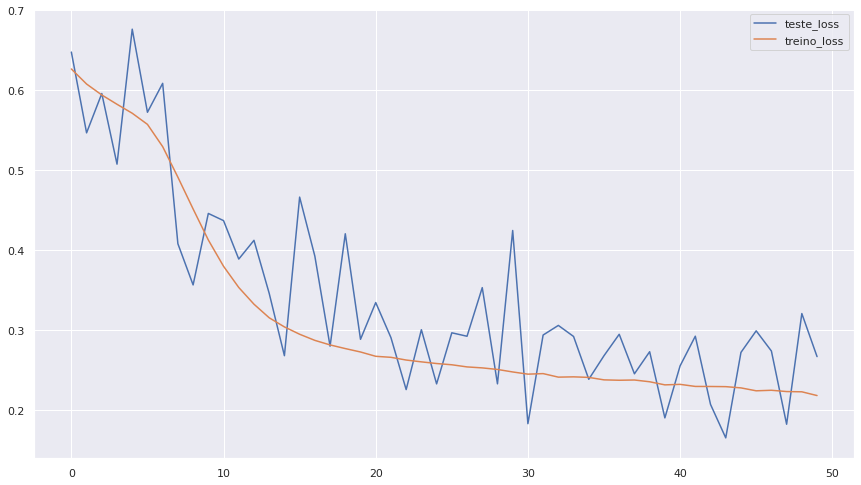

In [176]:
import matplotlib.pyplot as plt

val_loss = model.history.history['val_loss']
loss = model.history.history['loss']

plt.figure()
plt.plot(val_loss, label='teste_loss')
plt.plot(loss, label = 'treino_loss')
plt.legend()
plt.show()

## Resultados em dados de teste

In [227]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


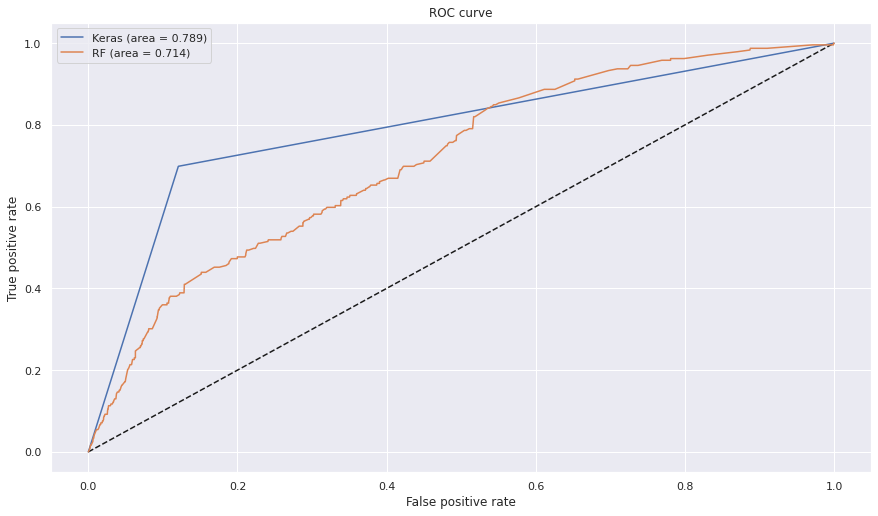

In [228]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_keras = model.predict_classes(X_test)
# y_pred_keras = model.predict(X_test)
# y_pred_keras = np.array([1 if p > 0.95 else 0 for p in y_pred_keras[:,1].tolist()])
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_k[:,1], y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [225]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

y_pred = model.predict_classes(X_test)
# y_pred = model.predict(X_test)
# y_pred = np.array([1 if p > 0.95 else 0 for p in y_pred[:,1].tolist()])

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test_k[:,1], y_pred))
print("Acuracia:", accuracy_score(y_test_k[:,1], y_pred))
print("AUC:", roc_auc_score(y_test_k[:,1], y_pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94     49331
         1.0       0.03      0.70      0.05       239

    accuracy                           0.88     49570
   macro avg       0.51      0.79      0.49     49570
weighted avg       0.99      0.88      0.93     49570

[[43378  5953]
 [   72   167]]
Precision: 0.027287581699346405
Recall: 0.698744769874477
Acuracia: 0.8784547105103894
AUC: 0.7890350716859361


## Salvar modelo

In [241]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
